In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Lec4: Logistic Regression

logistic regression의 목적: y=1, 즉 사건이 발생할 확률을 구하는 것.

CDF 누적 확률 분포 함수 이용해서 구함. 

Logistic Distribution의 CDF: exp(y)/1+exp(y)

Logistic Regression 할 때는 y자리에 regression 선형 함수 넣어서 계산한다.

Q) 왜 logistic regression 하더라?
아 y가 binary 할 때 였나?

alpha, beta 구해야함. 그래di reg 선형 함수 구하지.

alpha, beta 추정해야함!

#### alpha, beta 추정하기  - logistic regression by using MLE

MLE Maximum Likelihood Estimation 최우추정법

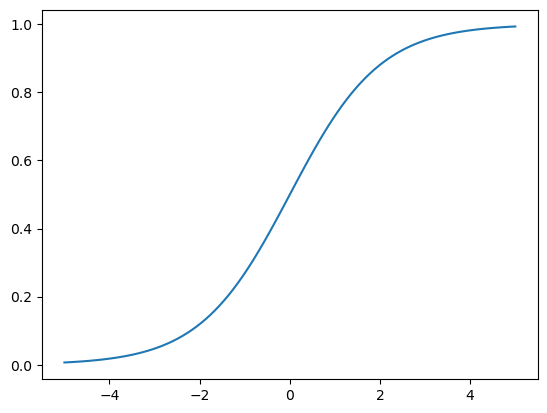

In [2]:
# Logistic Distribution 의 CDF 그려보기

x=np.linspace(-5,5,100)
y=np.exp(x)/(1+np.exp(x))
plt.plot(x,y)
plt.show()

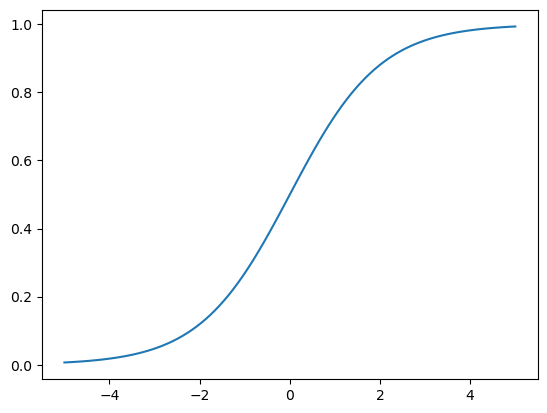

In [4]:
# Python에 내장된 logistic distribution의 cdf 쓰자

x=np.linspace(-5,5,100)
y=logistic.cdf(x)
plt.plot(x,y)
plt.show()

### 승산 odds

승산: 사건이 발생하지 않을 확률에 비해 사건이 발생할 확률이 몇 배냐?
-> 비율
-> 확률의 비율

승산이 작다: 사건이 발생할 확률 보다 발생하지 않을 확률이 크다.
승산이 크다: 사건이 발생할 확률이 즉 y=1일 확률이 매우 크다.

승산의 범위: 0에서 무한대

##### 승산을 이용하면 Logistic Distribution이 간단하게 계산된다.

로그 승산=x변수의 선형 함수
-> x가 한 단위 증가하면, y가 1일 확률이 얼마나 변하냐..

흐음 기억 안나. 어쨌든..

MLE로 beta 추정



In [5]:
file1="c:/temp/credit_LN4.csv"
credit=pd.read_csv(file1)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [6]:
y=credit['default']
x=credit['balance']
X=sm.add_constant(x)

# default를 Yes, No에서 숫자로 받아들이기 -> dummy variable로 만들기
y=pd.get_dummies(y)
y=y['Yes']

logit_model=sm.Logit(y,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                     inf
Time:                        14:11:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

balance가 1증가할 수록 default 할 확률 0.55% 증가

### Y=1일 확률(사건이 발생할 확률) 계산하기

1) 공식 외워서 베타 추정값을 넣어서 해도 됨.

2) python에 내장된 함수 이용


EX. balance가 1000인 사람의 사건 발생 확률은 얼마?

In [8]:
# python에 내장된 함수 이용

# 상수항은 1이고, balance x값은 1000일 때 = Pr(Y=1|balance=1000)
# 이게 뭔말이야
X1=[1,1000]

logit_model.predict(X1)

array([0.00575215])

In [9]:
# Pr(Y=1|balance=2000)
X2=[1,2000]
logit_model.predict(X2)

array([0.58576937])

In [10]:
# 1000에서 2000으로 늘어났는데, default할 확률 엄청 늘어났음.

In [15]:
# 식 4 해보기 1

y=credit['default']
x=credit['student']
X=sm.add_constant(x)

X=pd.get_dummies(x)
X=X['Yes']

y=pd.get_dummies(y)
y=y['Yes']

logit_model_2=sm.Logit(y,X).fit()
logit_model_2.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9999
Method:                           MLE   Df Model:                            0
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                     inf
Time:                        14:25:55   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Yes           -3.0992      0.091    -34.165      0.000      -3.277      -2.921
==============================================================================
"""

In [19]:
# 식 4 해보기 2

y=credit['default']
x=credit['student']
X=sm.add_constant(x)

x=pd.get_dummies(x)
X=x['Yes']

y=pd.get_dummies(y)
y=y['Yes']

logit_model_3=sm.Logit(y,X).fit()
logit_model_3.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9999
Method:                           MLE   Df Model:                            0
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                     inf
Time:                        14:27:44   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Yes           -3.0992      0.091    -34.165      0.000      -3.277      -2.921
==============================================================================
"""

## 위에 뭐징..

# Multiple Predictors Case

여러 independent variables 사용해서 예측.

로그 승산=x변수의 선형함수

ML추정으로 추정

각각 coefficient의 값 해석 중요!

ex. coeff. 가 마이너스: x변수가 증가하면 로그 승산 감소= 사건이 발생할 확률 감소

In [20]:
# student의 Yes, No를 0,1의 dummy variable로 변경

stu=pd.get_dummies(credit['student'])
stu

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


In [22]:
# 위에 만든 더미변수를 credit에 새 변수 (stu_yes) 변수로 추가
credit['stu_yes']=stu['Yes']
credit

,Unnamed: 0,default,student,balance,income,stu_yes
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,1
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914,0
9996,9997,No,No,757.962918,19660.721768,0
9997,9998,No,No,845.411989,58636.156984,0
9998,9999,No,No,1569.009053,36669.112365,0


In [26]:
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)
X

,const,stu_yes,income,balance
0,1.0,0,44361.625074,729.526495
1,1.0,1,12106.134700,817.180407
2,1.0,0,31767.138947,1073.549164
3,1.0,0,35704.493935,529.250605
4,1.0,0,38463.495879,785.655883
...,...,...,...,...
9995,1.0,0,52992.378914,711.555020
9996,1.0,0,19660.721768,757.962918
9997,1.0,0,58636.156984,845.411989
9998,1.0,0,36669.112365,1569.009053


In [27]:
y=credit['default']
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)

y=pd.get_dummies(y)
y=y['Yes']

logit_model1=sm.Logit(y,X).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                     inf
Time:                        14:43:40   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
stu_yes       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance        0.0057      0.000     24.737      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 결과 해석

-0.6468: 학생이면 default할 확률 낮아진다.
3.033e-06: 소득이 1높아지면 default할 확률이 커진다. 흠.. 양,음만 의미가 있나?
0.0057:  balane 많을 수록 default할 확률 크다.

p value

##### 정확한 해석
계량에서 해석할 때는, ceteris peribus, 다른 조건은 일정할 때,
'...면' 이렇게 해석해야한다.

아마 현실에서는 학생이 더 balance가 많을 것이기 때문에 학생이 더 risky 하다고 나올 것이다.
# 뭔말이야
저 coeff. 결과는, 근데 balance가 같다면, 학생이 덜 위험하다는 뜻.

boxplot 보면 알 수 있다.

#### confounding effect
학생만 변수로 사용하면 학생일 때 더 위험하다. 
학생과 balance를 동시에 넣어서 추정하면 학생이 덜 위험하게 나온다.

즉 두 변수는 혼합되어있다!

분리하면 오히려 학생은 덜 위험하다. 
# 뭔말이야

그래서 혼합되어있을 때는 balance가 더 많아서 위험한지, 학생이라 위험한 건지 알 수 없다.
# 뭔말이야

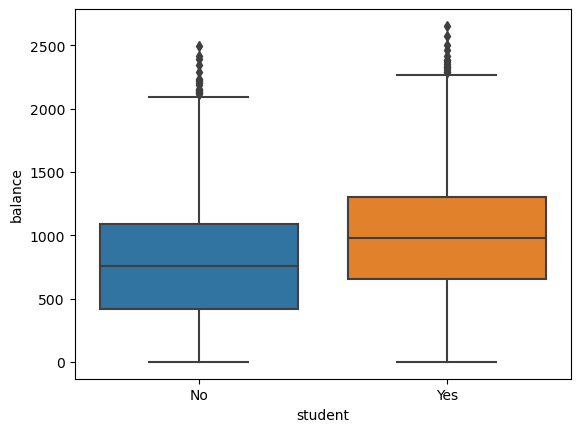

In [30]:
# boxplot 어케 그리지
# 오 그림
sns.boxplot(x='student',y='balance',data=credit)
plt.show()

In [32]:
# 3.4 prediction

X1=[1,1,40000,1500] 
# 상수항(?) 이거 뭐지?? student=Yes,income=40000, balance=1500
logit_model1.predict(X1)

array([0.05788194])

In [34]:
X2=[1,0,40000,1500]
logit_model1.predict(X2)

array([0.10499192])

# Multinomial Logistic Regression

y가 binary 하지 않은..




## ROC curve and confusion matrix

ROC curve: 가능한 모든 threshold 에서 측정한 classification rate을 그래프로 보여주는 방식

예측의 성과를 파악하기 위해서는 예측값과 진짜 y값을 비교,
근데 여기서 사건이 발생하냐, 아니냐를  즉 1이냐 0이냐, 즉 어떤 사건이일어나느냐를 결정하는 threshold가 뭐냐? 0.5?

Specificity 특이도 : Y=0인데, 0으로 예측할 확률
Sensitivity 민감도 : Y=1인데, 1로 예측할 확률

특이도와 민감도가 높을 수록 예측 잘한 것.
But, 하나가 높으면 다른 하나는 반드시 낮아야함.

즉 특이도와 민감도가 예측 잘했는지를 판단 할 수 있도록 함.

그래서 특이도와 민감도를 이용해서 모든 threshold에 대한 특이도와 민감도를 찍어서 커브를 그리면 ROC curve

##### ROC Curve의 모양

모양을 비교해서 어떤 게 더 예측 잘하는 모형인지 판단.

-> 곡선 아래쪽 면적(AUC)이 클수록 예측 잘한다.
AUC 의 최댓값=1

일반적으로 AUC=0.85이면 좋다고 판단함

sk 라이브러리 사용

In [47]:
x=credit[['stu_yes','income','balance']]
y=credit['default']

y=pd.get_dummies(y)
y=y['Yes']

clf=LogisticRegression().fit(x,y)
clf

LogisticRegression()

In [48]:
clf.coef_

array([[-3.89009045e+00, -1.33893466e-04,  4.08201022e-03]])

In [49]:
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)
y=credit['default']

y=pd.get_dummies(y)
y=y['Yes']

clf=LogisticRegression().fit(X,y)
clf

LogisticRegression()

In [50]:
clf.coef_

array([[-2.60406897e+00, -3.43293108e+00, -9.97153152e-05,
         4.79880297e-03]])

In [51]:
# roc curve, auc

pred1=clf.predict_proba(X)
pred1
#사건이 발생할 확률
#0칼럼: 0이 될 확률, 1칼럼: 1이 될 확률

array([[9.97829917e-01, 2.17008289e-03],
       [9.97339954e-01, 2.66004589e-03],
       [9.61729627e-01, 3.82703728e-02],
       ...,
       [9.99087213e-01, 9.12786569e-04],
       [7.91706855e-01, 2.08293145e-01],
       [9.99913768e-01, 8.62324578e-05]])

In [52]:
roc_curve(y,pred1[:,1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03444709e-04,
        1.03444709e-04, 2.06889418e-04, 2.06889418e-04, 3.10334126e-04,
        3.10334126e-04, 4.13778835e-04, 4.13778835e-04, 6.20668253e-04,
        6.20668253e-04, 7.24112962e-04, 7.24112962e-04, 9.31002379e-04,
        9.31002379e-04, 1.03444709e-03, 1.03444709e-03, 1.24133651e-03,
        1.24133651e-03, 1.34478121e-03, 1.34478121e-03, 1.55167063e-03,
        1.55167063e-03, 1.75856005e-03, 1.75856005e-03, 1.86200476e-03,
        1.86200476e-03, 1.96544947e-03, 1.96544947e-03, 2.06889418e-03,
        2.06889418e-03, 2.17233888e-03, 2.17233888e-03, 2.37922830e-03,
        2.37922830e-03, 2.68956243e-03, 2.68956243e-03, 2.79300714e-03,
        2.79300714e-03, 2.89645185e-03, 2.89645185e-03, 3.10334126e-03,
        3.10334126e-03, 3.31023068e-03, 3.31023068e-03, 3.41367539e-03,
        3.41367539e-03, 3.51712010e-03, 3.51712010e-03, 3.82745423e-03,
        3.82745423e-03, 3.93089893e-03, 3.93089893e-03, 4.137788

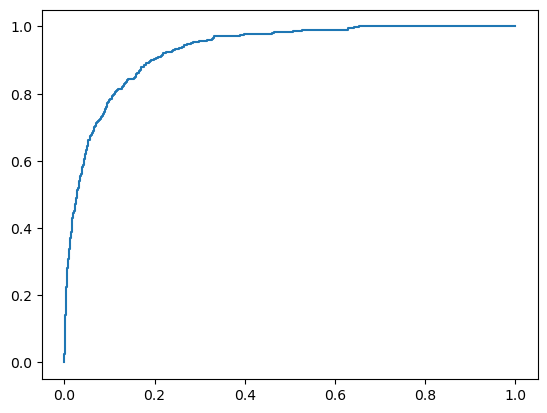

In [53]:
fpr,tpr,thresholds=roc_curve(y,pred1[:,1])
plt.plot(fpr,tpr)
plt.show()

In [54]:
roc_auc_score(y,pred1[:,1])

0.9296759260553613

## Confusion matrix

정확하게 맞춘 비율의 합= spec+sensi= n00/n+n11/n=ccr

In [55]:
pred2=clf.predict(X)
pd.value_counts(pred2)
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

predict: 확률을 계산한 다음에 0.5보다 크면 1, 0.5보다 작으면 0으로 까지로 보여줌.

# 왜?

In [56]:
confusion_matrix(y,pred2)

array([[9615,   52],
       [ 252,   81]], dtype=int64)

In [57]:
CCR=(9615+81)/10000
CCR

0.9696

# 이게 뭐여?

# 0411 Lec4~5 들은 부분


## Out of sample prediction

In [58]:
x=credit['balance']
y=credit['default']
y=pd.get_dummies(y)
y=y['Yes']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0 )

In [60]:
file2="c:/temp/smarket.csv"
smarket=pd.read_csv(file2,index_col='Year',parse_dates=True)
smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...
2005-01-01,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
2005-01-01,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
2005-01-01,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [69]:
smarket.index=smarket.index.year
smarket
# 왜 안돼??

AttributeError: 'Int64Index' object has no attribute 'year'

In [70]:
# 나머짓 실습은 lec4 보고 해볼것!
# 나중에
# 나머지 실습이 뭔데...

# Lec 5: Classification using K-NN

supervised learning ~ Classification ~ Logistic, K-NN

In [72]:
# 거리 구하기 : 피타고라스 / 유클리드형 distance

np.sqrt(((6-3)**2)+((4-7)**2))

4.242640687119285

### 2.2 Choosing an appropriate k

large k -> 분산 감소 -> 값의 판단에 있어 결과 잘 바뀌지 않음.
-> 오류 감수한 일반화 가능

small k -> 분산 증가 -> 값 잘 바뀜 -> 일반화 어렵

#### K 정하기

#### 표준화
측정단위에 의존하지 않게 표준화

In [73]:
x=[10,15,20,70,90]
x

[10, 15, 20, 70, 90]

In [74]:
# 표준화된 값 = x_st
x_st=(x-np.mean(x))/np.sqrt(np.var(x))
x_st

array([-0.95036598, -0.79708114, -0.64379631,  0.88905204,  1.50219138])

In [75]:
x_stan=(x-np.mean(x))/np.std(x)
x_stan

array([-0.95036598, -0.79708114, -0.64379631,  0.88905204,  1.50219138])

#### 최소-최대 정규화 min-max normalization

표준 정규화: -3,3을 약간 벗어나기도 함. 그래서 음수와 양수의 한정되지 않은 범위에 놓여있다는 것. 

최소최대: 항상 [0,1] 의 범위 가짐

In [76]:
(x-np.min(x))/(np.max(x)-np.min(x))

array([0.    , 0.0625, 0.125 , 0.75  , 1.    ])